# Model Data Analysis

### Load Dependencies

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import nest


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.7.0
 Built: Apr 15 2024 07:13:33

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



### Function To Load Data

In [19]:
def load_data(tau=1000, count_number=1, data_index=1):
    data_file = "exp_data/" + str(tau) + "_tau/data_spike_" + str(count_number) +".npy"
    data = np.load(data_file, allow_pickle=True)[data_index]
    global high_spike_recorder
    global low_spike_recorder
    global ring_spike_recorders
    global gain_high_spike_recorders
    global gain_low_spike_recorders
    global perirhinal_fdn_spike_recorders
    global perihinal_inhibitory_spike_recorder
    global perihinal_decision_spike_recorder
    global perihinal_vision_decision_spike_recorder
    high_spike_recorder = data.get("high_spike")
    low_spike_recorder = data.get("low_spike")
    ring_spike_recorders = data.get("ring_spike")
    gain_high_spike_recorders = data.get("gain_high_spike")
    gain_low_spike_recorders = data.get("gain_low_spike")
    perirhinal_fdn_spike_recorders = data.get("per_fdn_spike")
    perihinal_inhibitory_spike_recorder = data.get("per_in_spike")
    perihinal_decision_spike_recorder = data.get("per_de_spike")
    perihinal_vision_decision_spike_recorder = data.get("per_vde_spike")

/tmp/ipykernel_8170/1709189418.py:20: UserWarning:color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.


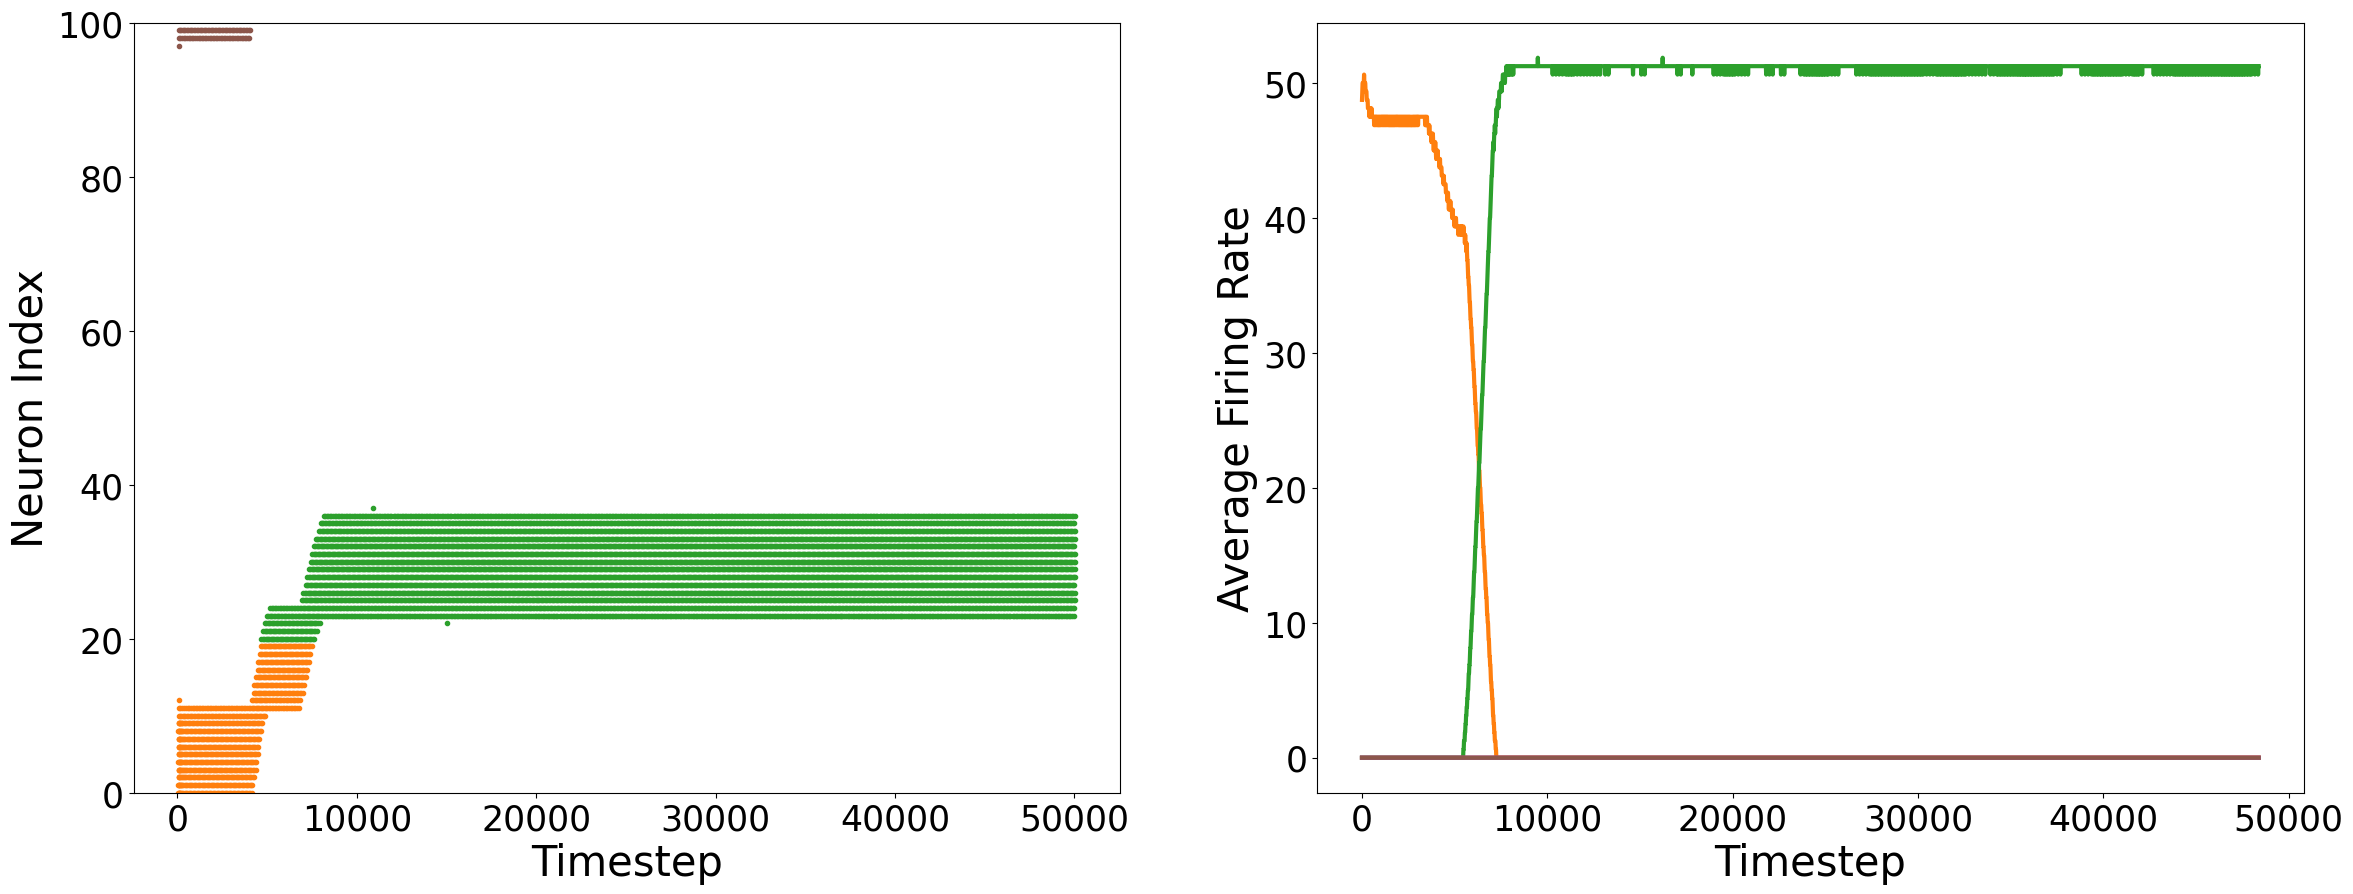

In [24]:
def full_run():
    """
        The following method runs the analysis for the full run of the whole project. These will include
        plotting of data as required by the model.
    """
    # Load Data
    load_data(count_number=2)

    # Start Drawing
    fig, axs = plt.subplots(1,2)
    fig.set_size_inches(28,10)
    
    # Draw Ring Attractor Firing Rates
    fig_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
    i = 0
    for index in range(100):
        if (index % 20) == 0:
            i+=1
        ts = ring_spike_recorders[index]
        axs[0].plot(ts[ts>50], np.full(shape=len(ts[ts>50]),fill_value=index,dtype=np.int64), "k.", color = fig_colors[i])
    axs[0].set_ylim([0, 100])
    axs[0].set_xlabel("Timestep", fontsize = 30)
    axs[0].set_ylabel("Neuron Index", fontsize = 30)
    axs[0].tick_params(axis='x', labelsize=25)
    axs[0].tick_params(axis='y', labelsize=25)

    # Draw perirhinal vision cortex firing rates
    window_frame = 1600
    for index in range(len(perirhinal_fdn_spike_recorders)):
        ts = perirhinal_fdn_spike_recorders[index]
        fr_list = []
        timestep = []
        window_start = 0
        while (window_start + window_frame) < 50000: 
            fr = len([x for x in ts if ((x >= window_start) and (x < window_start + window_frame))]) * (1000/window_frame)
            fr_list.append(fr)
            timestep.append(window_start)
            window_start += window_frame/100
        axs[1].plot(timestep, fr_list, lw=3.0, color=fig_colors[index + 1])
    # axs[1].set_ylim([0.0, 1.0])
    # axs[1].set_yticks([0,1,2,3,4])
    axs[1].set_xlabel("Timestep", fontsize = 30)
    axs[1].set_ylabel("Average Firing Rate", fontsize = 30)
    axs[1].tick_params(axis='x', labelsize=25)
    axs[1].tick_params(axis='y', labelsize=25)
    plt.show()

full_run()
